In [26]:
from scipy.interpolate import griddata
import numpy as np
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

In [27]:
# Run code extracting the sigma_x, sigma_y and theta from the images
# The code needs to be run separetely because of the optimization function output hitting jupyter's size limit
#%run PSF-map-code

In [28]:
# Read data produced by PSF-map-code.py
with open("../sigma_x_map.dat", "r") as tf:
    sigma_x_map = np.fromfile(tf)
sigma_x_map = sigma_x_map.reshape((4176, 6248))
sigma_x_map[sigma_x_map > 8] = None
sigma_x_map[sigma_x_map == 0] = None

with open("../sigma_y_map.dat", "r") as tf:
    sigma_y_map = np.fromfile(tf)
sigma_y_map = sigma_y_map.reshape((4176, 6248))
sigma_y_map[sigma_y_map > 8] = None
sigma_y_map[sigma_y_map == 0] = None

with open("../theta_map.dat", "r") as tf:
    theta_map = np.fromfile(tf)
theta_map = theta_map.reshape((4176, 6248))
theta_map[theta_map > 2*np.pi] = None
theta_map[theta_map == 0] = None

sigma_map = np.sqrt(sigma_x_map**2 + sigma_y_map**2)


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_65487/2408286631.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


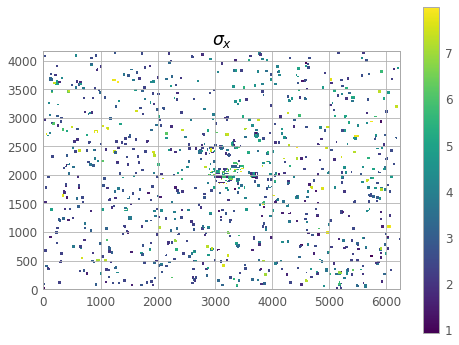

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_65487/2408286631.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


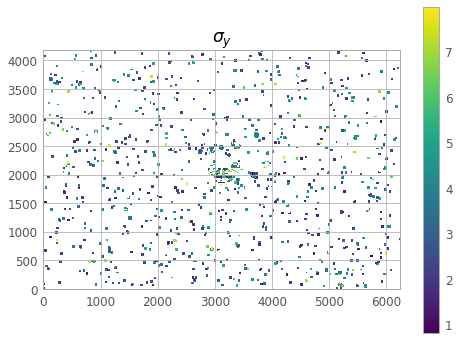

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_65487/2408286631.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


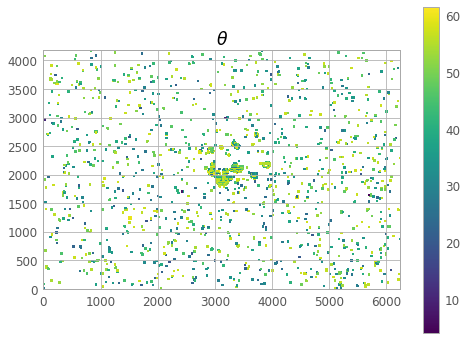

In [29]:
plt.figure()
plt.title(r'$\sigma_x$')
plt.imshow(np.abs(sigma_x_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\sigma_y$')
plt.imshow(np.abs(sigma_y_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\theta$')
plt.imshow(theta_map*180/np.pi, origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


In [30]:
# inteprolation to fill out empty spaces
shape = np.shape(sigma_map)
points = np.where(np.logical_not(np.isnan(sigma_map)))
points_x, points_y = points
values = [x for x in np.ravel(sigma_map) if not np.isnan(x)]
grid_x, grid_y = np.meshgrid(range(shape[0]), range(shape[1]))


In [31]:
outgrid = griddata((points_x, points_y), values,
                   (grid_x, grid_y), method='nearest')


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_65487/1982808567.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


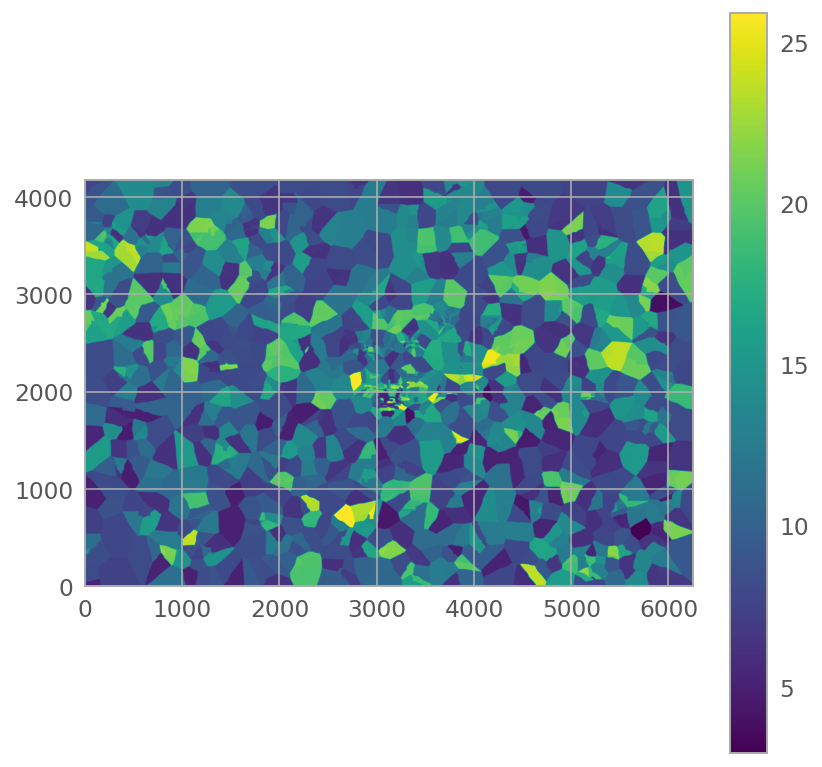

In [35]:
outgrid[outgrid > 11] = 11
coeff = 2*np.sqrt(2*np.log(2))

plt.figure(figsize=(7,7), dpi=140)
plt.imshow(np.abs(coeff * outgrid.T), origin='lower',
           cmap='viridis', interpolation='bilinear')
plt.colorbar()
